# MNIST
## Reconocimiento de Dígitos

Librerías

In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline 

Using TensorFlow backend.


Importar datos MNIST

In [2]:
from keras.datasets import mnist

Dividir dataset en:
* `X_train, y_train`: Set de entrenamiento
* `X_test, y_test`: Set de pruebas

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

La estructura de los datos se divide:
* `60000 filas`: Número de muestras para el entrenamiento
* `Columas -> Arreglo de 28x28`: Pixeles que conforman información de un dato(dato se refiere a una imagen)

In [4]:
print(X_train.shape) # Column is 2D array (28x28px)
print(y_train.shape) 

(60000, 28, 28)
(60000,)


Visualizando los 4 primeros datos con `matplotlib`

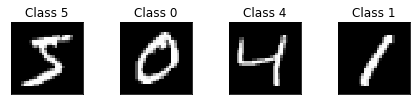

In [5]:
fig = plt.figure()
for i in range(4):
    plt.subplot(1, 4,i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

De momento el `input` es de $28x28$, pero tenemos una única entrada de $784$, por lo cuál se deben transformar las columnas de los dataset 

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape) # Rows samples, Columns information about samples (28x28 pixels)
print(y_train.shape) 

(60000, 784)
(60000,)


Normalización de datos

In [7]:
X_train /= 255
X_test /= 255

In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=128, epochs=5,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 22s - loss: 0.2479 - acc: 0.9257 - val_loss: 0.1100 - val_acc: 0.9633
Epoch 2/5
 - 23s - loss: 0.1004 - acc: 0.9682 - val_loss: 0.0855 - val_acc: 0.9725
Epoch 3/5
 - 22s - loss: 0.0710 - acc: 0.9773 - val_loss: 0.0802 - val_acc: 0.9739
Epoch 4/5
 - 22s - loss: 0.0553 - acc: 0.9824 - val_loss: 0.0597 - val_acc: 0.9824
Epoch 5/5
 - 22s - loss: 0.0458 - acc: 0.9853 - val_loss: 0.0649 - val_acc: 0.9809


Guardar el modelo

In [12]:
save_dir = './results/'
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved model at ', model_path)

Saved model at  ./results/keras_mnist.h5


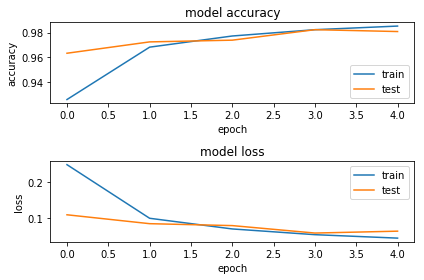

In [13]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [14]:
mnist_model = load_model('./results/keras_mnist.h5')
loss_and_metrics = mnist_model.evaluate(X_test, y_test, verbose = 2)
print("Loss in test", loss_and_metrics[0])
print("Accuracy in test", loss_and_metrics[1])

Loss in test 0.06493303135514725
Accuracy in test 0.9809


In [16]:
predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


0  classified correctly
1  classified incorrectly


/home/rendon/Documents/keras/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rendon/Documents/keras/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
